# 201904223 이동현 201904241 정효준

# 대규모 점포 수

In [1]:
import pandas as pd
import numpy as np

In [2]:
large_store= pd.read_csv('서울시광진구대규모점포인허가정보.csv')
large_store.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),점포구분명,Unnamed: 26
0,3040000,2.001300e+18,19701223,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,143843,노룬산시장,2013-12-23 16:36,I,59:59.0,그 밖의 대규모점포,205663.0811,448250.3634,대규모점포,NaN
1,3040000,2.001300e+18,19710501,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,143841,조양시장,2017-12-08 10:38,I,59:59.0,그 밖의 대규모점포,205886.289,448517.3386,대규모점포,NaN
2,3040000,2.001300e+18,19710508,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,143903,중곡제일시장,2012-01-04 17:05,I,59:59.0,그 밖의 대규모점포,207114.4989,451296.0494,대규모점포,NaN
3,3040000,2.001300e+18,19740209,NaN,3,폐업,3,폐업처리,20210127.0,NaN,...,143819,구의시장,2021-01-29 18:09,U,40:00.0,그 밖의 대규모점포,207754.5752,449270.2315,대규모점포,NaN
4,3040000,2.001300e+18,19740701,NaN,3,폐업,3,폐업처리,20060123.0,NaN,...,NaN,화양시장,2012-01-04 16:32,I,59:59.0,그 밖의 대규모점포,NaN,NaN,대규모점포,NaN


In [3]:
large_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   개방자치단체코드     32 non-null     int64  
 1   관리번호         32 non-null     float64
 2   인허가일자        32 non-null     object 
 3   인허가취소일자      0 non-null      float64
 4   영업상태코드       32 non-null     int64  
 5   영업상태명        32 non-null     object 
 6   상세영업상태코드     32 non-null     int64  
 7   상세영업상태명      32 non-null     object 
 8   폐업일자         6 non-null      float64
 9   휴업시작일자       0 non-null      float64
 10  휴업종료일자       0 non-null      float64
 11  재개업일자        1 non-null      object 
 12  전화번호         32 non-null     object 
 13  소재지면적        32 non-null     float64
 14  소재지우편번호      11 non-null     object 
 15  지번주소         32 non-null     object 
 16  도로명주소        31 non-null     object 
 17  도로명우편번호      31 non-null     object 
 18  사업장명         32 non-null     object 
 19  최종수정일자    

#### 사용할 칼럼들로 데이터 프레임 만들기

In [4]:
cols=['영업상태코드','사업장명','좌표정보(X)','좌표정보(Y)']

In [5]:
large_store=large_store[cols]
large_store.head()

,영업상태코드,사업장명,좌표정보(X),좌표정보(Y)
0,1,노룬산시장,205663.0811,448250.3634
1,1,조양시장,205886.289,448517.3386
2,1,중곡제일시장,207114.4989,451296.0494
3,3,구의시장,207754.5752,449270.2315
4,3,화양시장,NaN,NaN


### 폐업한 점포 drop

In [6]:
store = large_store[large_store['영업상태코드'] == 3].index
large_store=(
    large_store.drop(store)
    .reset_index()
    .drop("index", axis=1)
    .drop(25)
)


In [7]:
large_store

,영업상태코드,사업장명,좌표정보(X),좌표정보(Y)
0,1,노룬산시장,205663.0811,448250.3634
1,1,조양시장,205886.289,448517.3386
2,1,중곡제일시장,207114.4989,451296.0494
3,1,신성종합시장,207747.894,450639.201
4,1,자양종합시장,206686.3645,447752.4632
5,1,한아름시장,206107.7752,449029.3422
6,1,광성시장,207098.9948,451260.4457
7,1,동서울터미널상가,208201.9933,447967.2995
8,1,현대종합상가,208644.8192,448711.7258
9,1,구의현대종합상가,208403.7461,448490.2392


# TM좌표계에서 WGS84좌표계로 변환하기

In [8]:
import pyproj
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [9]:
store_coord=large_store[['좌표정보(X)','좌표정보(Y)']]

In [10]:
store_coord = np.array(store_coord)

p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(store_coord, p1_type, p2_type)
result

C:\Algorithm\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Algorithm\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\HJ\AppData\Local\Temp\ipykernel_26120\2935142562.py:11: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy = pyproj.transform(p1, p2, coord

array([[127.0619724 ,  37.53648692],
       [127.06449997,  37.53889096],
       [127.07842352,  37.5639183 ],
       [127.08558574,  37.55799511],
       [127.07354572,  37.53199409],
       [127.06701024,  37.54350265],
       [127.0782477 ,  37.56359763],
       [127.09069545,  37.53391763],
       [127.09571426,  37.54062084],
       [127.09298401,  37.53862747],
       [127.09473101,  37.53739771],
       [127.09287476,  37.5356997 ],
       [127.09287476,  37.5356997 ],
       [127.0812634 ,  37.53090625],
       [127.06974203,  37.53780314],
       [127.06824671,  37.53878862],
       [127.06819694,  37.54843788],
       [127.07842352,  37.5639183 ],
       [127.06701024,  37.54350265],
       [127.0859237 ,  37.5544905 ],
       [127.07714215,  37.55762634],
       [127.08928666,  37.55197768],
       [127.09137971,  37.54053362],
       [127.0630596 ,  37.54115165],
       [127.08588773,  37.54549982]])

In [11]:
large_store['경도'] = result[:, 0]
large_store['위도'] = result[:, 1]
large_store.head()

,영업상태코드,사업장명,좌표정보(X),좌표정보(Y),경도,위도
0,1,노룬산시장,205663.0811,448250.3634,127.061972,37.536487
1,1,조양시장,205886.289,448517.3386,127.064500,37.538891
2,1,중곡제일시장,207114.4989,451296.0494,127.078424,37.563918
3,1,신성종합시장,207747.894,450639.201,127.085586,37.557995
4,1,자양종합시장,206686.3645,447752.4632,127.073546,37.531994


## 시각화

In [12]:
import requests
url = 'https://raw.githubusercontent.com/vuski/admdongkor/master/ver20230401/HangJeongDong_ver20230401.geojson'
response = requests.get(url).json()

# 키 값 확인
response.keys()
# dict_keys(['type', 'name', 'crs', 'bbox', 'features'])

# 전국 데이터에서 서울시만 추출
seoul_geo = response.copy()
seoul_geo['features'] = []

# 서울시 행정동 경계만 추출
for i in response['features']:
    if i['properties']['sggnm'] == '광진구':
        seoul_geo['features'].append(i)

# 행정동 수 확인
len(seoul_geo['features'])
# 426

15

In [13]:
import folium
from folium import Marker

m = folium.Map(location=[37.53913,127.08366], zoom_start=14)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

for i in range(len(large_store)):
      Marker(location = [large_store.loc[i]['위도'], large_store.loc[i]['경도']],
           popup=large_store.loc[i]['사업장명'],icon=folium.Icon(color='blue')
          ).add_to(m)



m

# 단란주점 

In [14]:
pub=pd.read_csv('서울시광진구단란주점영업인허가정보.csv')
pub.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3040000,3040000-103-1993-06863,19931030,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,97.94,NaN,NaN,NaN
1,3040000,3040000-103-1993-06865,19931122,NaN,3,폐업,2,폐업,20001226.0,NaN,...,NaN,NaN,NaN,NaN,NaN,N,113.82,NaN,NaN,NaN
2,3040000,3040000-103-1993-06871,19931026,NaN,3,폐업,2,폐업,19950403.0,NaN,...,NaN,NaN,NaN,NaN,NaN,N,68.88,NaN,NaN,NaN
3,3040000,3040000-103-1993-06877,19931227,NaN,3,폐업,2,폐업,19960708.0,NaN,...,NaN,NaN,NaN,NaN,NaN,N,102.06,NaN,NaN,NaN
4,3040000,3040000-103-1993-06886,19931110,NaN,3,폐업,2,폐업,19941102.0,NaN,...,NaN,NaN,NaN,NaN,NaN,N,104.14,NaN,NaN,NaN


In [15]:
pub.columns


Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적', '지번주소',
       '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분', '데이터갱신일자', '업태구분명',
       '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명',
       '급수시설구분명', '총인원', '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수',
       '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식',
       '홈페이지'],
      dtype='object')

In [16]:
pub_cols=['영업상태코드','지번주소','좌표정보(X)','좌표정보(Y)']

In [17]:
pub=pub[pub_cols]
pub

,영업상태코드,지번주소,좌표정보(X),좌표정보(Y)
0,1,서울특별시 광진구 자양동 581-4,206577.288,447806.088
1,3,서울특별시 광진구 구의동 252-109번지,207330.3474,448491.5017
2,3,서울특별시 광진구 중곡동 231-39번지,207030.4556,451370.8195
3,3,서울특별시 광진구 화양동 115-7번지,206244.3999,449468.6784
4,3,서울특별시 광진구 구의동 78-7번지,207848.0747,449668.6988
...,...,...,...,...
331,1,서울특별시 광진구 화양동 111-161번지,206276.7696,449466.3607
332,3,서울특별시 광진구 자양동 679-31번지,207459.2549,447773.81
333,3,서울특별시 광진구 화양동 21-41번지,205955.0647,449500.9083
334,3,서울특별시 광진구 광장동 21,209766.9736,450385.0007


## 폐업한 점포 drop

In [18]:
idx = pub[pub['영업상태코드'] == 3].index
pub=(
    pub.drop(idx)
    .reset_index()
    .drop("index", axis=1)
)
pub

,영업상태코드,지번주소,좌표정보(X),좌표정보(Y)
0,1,서울특별시 광진구 자양동 581-4,206577.288,447806.088
1,1,서울특별시 광진구 구의동 246-75,207482.6037,448345.6101
2,1,서울특별시 광진구 구의동 252-90,207326.7236,448373.8358
3,1,서울특별시 광진구 자양동 624-30,단란주점,207234.6846
4,1,서울특별시 광진구 구의동 243-22,207749.1213,448413.8608
...,...,...,...,...
65,1,서울특별시 광진구 화양동 114-5,206247.9521,449443.9732
66,1,서울특별시 광진구 광장동 323-2,209466.6238,449489.3333
67,1,서울특별시 광진구 화양동 49-14번지,205794.7956,448852.3032
68,1,서울특별시 광진구 광장동 186,단란주점,209559.4784


In [19]:
pub.isnull().sum()

영업상태코드     0
지번주소       0
좌표정보(X)    0
좌표정보(Y)    0
dtype: int64

## 좌표변환 후 좌표정보가 숫자가 아닌 데이터 drop

In [20]:
pub['좌표정보(X)'] = pd.to_numeric(pub['좌표정보(X)'], errors="coerce")
pub['좌표정보(Y)'] = pd.to_numeric(pub['좌표정보(Y)'], errors="coerce")

pub = pub.dropna()
pub.index=range(len(pub))
pub=pub.iloc[:,:4]
pub

,영업상태코드,지번주소,좌표정보(X),좌표정보(Y)
0,1,서울특별시 광진구 자양동 581-4,206577.2880,447806.0880
1,1,서울특별시 광진구 구의동 246-75,207482.6037,448345.6101
2,1,서울특별시 광진구 구의동 252-90,207326.7236,448373.8358
3,1,서울특별시 광진구 구의동 243-22,207749.1213,448413.8608
4,1,서울특별시 광진구 자양동 45-34,205670.8189,448202.8825
...,...,...,...,...
60,1,서울특별시 광진구 구의동 257-123,207548.7323,448438.5820
61,1,서울특별시 광진구 화양동 114-5,206247.9521,449443.9732
62,1,서울특별시 광진구 광장동 323-2,209466.6238,449489.3333
63,1,서울특별시 광진구 화양동 49-14번지,205794.7956,448852.3032


In [21]:
pub_coord=pub[['좌표정보(X)','좌표정보(Y)']]

In [22]:
pub_coord = np.array(pub_coord)

pub_result = project_array(pub_coord, p1_type, p2_type)
pub_result

C:\Algorithm\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Algorithm\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\HJ\AppData\Local\Temp\ipykernel_26120\2935142562.py:11: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy = pyproj.transform(p1, p2, coord

array([[127.07231214,  37.53247803],
       [127.08256011,  37.53733225],
       [127.08079668,  37.5375878 ],
       [127.08557634,  37.537945  ],
       [127.06205959,  37.53605907],
       [127.07429429,  37.53259374],
       [127.08804109,  37.55049324],
       [127.08124646,  37.5342056 ],
       [127.08072044,  37.53564604],
       [127.08984311,  37.53952314],
       [127.07985096,  37.56822014],
       [127.10535339,  37.54751189],
       [127.07068486,  37.54720633],
       [127.06385742,  37.54177518],
       [127.08177665,  37.53735996],
       [127.0851373 ,  37.55529133],
       [127.07914504,  37.53464694],
       [127.08578203,  37.5379977 ],
       [127.07035942,  37.54610922],
       [127.08182008,  37.56120403],
       [127.07812311,  37.5651109 ],
       [127.06674517,  37.54083033],
       [127.07537261,  37.5566895 ],
       [127.08315647,  37.54478896],
       [127.07706337,  37.5628901 ],
       [127.08572537,  37.55505553],
       [127.07772953,  37.53306217],
 

In [23]:
pub['경도'] = pub_result[:, 0]
pub['위도'] = pub_result[:, 1]
pub

,영업상태코드,지번주소,좌표정보(X),좌표정보(Y),경도,위도
0,1,서울특별시 광진구 자양동 581-4,206577.2880,447806.0880,127.072312,37.532478
1,1,서울특별시 광진구 구의동 246-75,207482.6037,448345.6101,127.082560,37.537332
2,1,서울특별시 광진구 구의동 252-90,207326.7236,448373.8358,127.080797,37.537588
3,1,서울특별시 광진구 구의동 243-22,207749.1213,448413.8608,127.085576,37.537945
4,1,서울특별시 광진구 자양동 45-34,205670.8189,448202.8825,127.062060,37.536059
...,...,...,...,...,...,...
60,1,서울특별시 광진구 구의동 257-123,207548.7323,448438.5820,127.083309,37.538169
61,1,서울특별시 광진구 화양동 114-5,206247.9521,449443.9732,127.068600,37.547238
62,1,서울특별시 광진구 광장동 323-2,209466.6238,449489.3333,127.105023,37.547619
63,1,서울특별시 광진구 화양동 49-14번지,205794.7956,448852.3032,127.063467,37.541910


## 시각화

In [24]:
m = folium.Map(
    location=[37.53913,127.08366],
    zoom_start=12, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

for i in range(len(pub)):
      Marker(location = [pub.loc[i]['위도'], pub.loc[i]['경도']],
           popup=pub.loc[i]['지번주소'], icon=folium.Icon(color='blue')
          ).add_to(m)

m

# 지하철 역

In [25]:
subway= pd.read_csv("https://raw.githubusercontent.com/henewsuh/subway_crd_line_info/main/%EC%A7%80%ED%95%98%EC%B2%A0%EC%97%AD_%EC%A2%8C%ED%91%9C.csv", encoding='cp949')
subway

,역이름,y,x
0,가락시장,37.492522,127.118234
1,종로3가,37.571607,126.991806
2,오금,37.502162,127.128111
3,동대문,37.571420,127.009745
4,동대문역사문화공원,37.565138,127.007896
...,...,...,...
584,동백,37.269043,127.152716
585,초당,37.260752,127.159443
586,삼가,37.242115,127.168075
587,시청·용인대,37.239151,127.178406


# 광진구 지하철역의 좌표 값

In [26]:
s1=subway[subway['역이름'] == '중곡' ]
s2=subway[subway['역이름'] == '군자' ] 
s3=subway[subway['역이름'] == '어린이대공원']
s4=subway[subway['역이름'] == '건대입구']
s5=subway[subway['역이름'] == '뚝섬유원지']
s6=subway[subway['역이름'] == '구의']
s7=subway[subway['역이름'] == '강변']
s8=subway[subway['역이름'] == '광나루']
s9=subway[subway['역이름'] == '아차산']
s_result=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9])
s_result=s_result.reset_index().drop('index', axis=1)
s_result

,역이름,y,x
0,중곡,37.565923,127.084320
1,군자,37.557121,127.079542
2,어린이대공원,37.548014,127.074658
3,건대입구,37.540693,127.070230
4,뚝섬유원지,37.531540,127.066704
5,구의,37.537077,127.085916
6,강변,37.535095,127.094681
7,광나루,37.545303,127.103570
8,아차산,37.551691,127.089761


# 지하철 역 위치 시각화

In [27]:
m = folium.Map(
    location=[37.53913,127.08366],
    zoom_start=13, 
)

folium.GeoJson(
    seoul_geo,
    name='행정동'
).add_to(m)

for i in range(len(s_result)):
      Marker(location = [s_result.loc[i]['y'], s_result.loc[i]['x']],
           icon=folium.Icon(color='blue')
          ).add_to(m)

m

# 광진구 주말 대중교통량

In [28]:
traffic = pd.read_csv("서울시 교통정보.csv")
traffic.head()

,기준일,행정동ID,행정동명,자치구ID,자치구명,분석유형,합계,합계00H,합계01H,합계02H,...,경기14H,경기15H,경기16H,경기17H,경기18H,경기19H,경기20H,경기21H,경기22H,경기23H
0,20230527,1115065,신정2동,11150,양천구,4,2269,11,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230527,1115069,신정6동,11150,양천구,4,3648,17,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230527,1110056,방학2동,11100,도봉구,4,3591,14,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230527,1110060,창2동,11100,도봉구,4,5459,11,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230527,1110061,창3동,11100,도봉구,4,3639,18,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 광진구의 시간대별 합계 교통량 

In [29]:
T=(
    traffic
    .groupby(['자치구명'])
    .agg('mean')
    .loc['광진구','합계00H':'합계23H']
    .round(0)
    .astype(int)

)
T

합계00H     62
합계01H     19
합계02H     15
합계03H      9
합계04H     29
합계05H    210
합계06H    299
합계07H    363
합계08H    608
합계09H    803
합계10H    835
합계11H    842
합계12H    928
합계13H    930
합계14H    884
합계15H    869
합계16H    934
합계17H    921
합계18H    812
합계19H    710
합계20H    702
합계21H    690
합계22H    581
합계23H    331
Name: 광진구, dtype: int32

<BarContainer object of 24 artists>

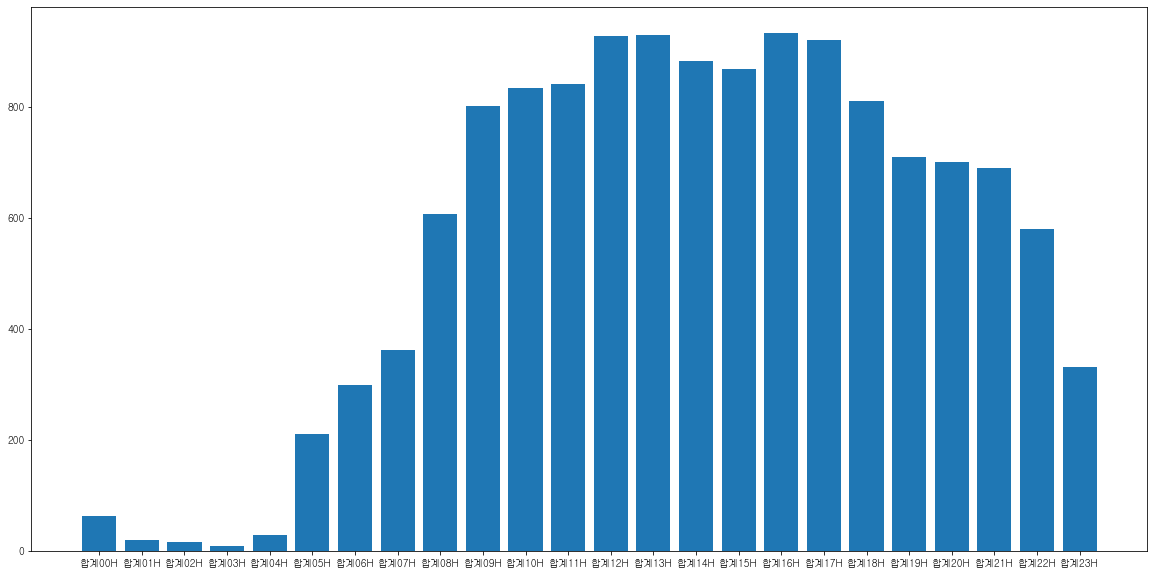

In [30]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(T.index, T)


## 서울시 교통정보 데이터 중 광진구 데이터만 가져오기

In [31]:
data = pd.read_csv("서울시 교통정보.csv",index_col='자치구명')
M=data.loc['광진구',:]
M

,기준일,행정동ID,행정동명,자치구ID,분석유형,합계,합계00H,합계01H,합계02H,합계03H,...,경기14H,경기15H,경기16H,경기17H,경기18H,경기19H,경기20H,경기21H,경기22H,경기23H
자치구명,,,,,,,,,,,,,,,,,,,,,
광진구,20230527,1105054,군자동,11050,4,6692,103,28,28,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105055,중곡1동,11050,4,3535,63,19,11,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105056,중곡2동,11050,4,4333,30,9,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105059,능동,11050,4,33848,106,23,16,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105060,구의1동,11050,4,21375,43,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105061,구의2동,11050,4,18757,27,6,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105063,광장동,11050,4,13898,17,7,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105064,자양1동,11050,4,4644,50,23,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
광진구,20230527,1105065,자양2동,11050,4,4927,11,4,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 행정동별로 합계량 구하기

In [32]:
M=(
    M
    .groupby(['행정동명'])
    .agg('mean')
    .loc[:,:'합계']
    .round(0)
    .astype('int')
    
)
M

,기준일,행정동ID,자치구ID,분석유형,합계
행정동명,,,,,
광장동,20230528,1105063,11050,4,12510
구의1동,20230528,1105060,11050,4,18744
구의2동,20230528,1105061,11050,4,15548
구의3동,20230528,1105062,11050,4,29823
군자동,20230528,1105054,11050,4,6139
능동,20230528,1105059,11050,4,29653
자양1동,20230528,1105064,11050,4,4197
자양2동,20230528,1105065,11050,4,4342
자양3동,20230528,1105066,11050,4,4291


<BarContainer object of 15 artists>

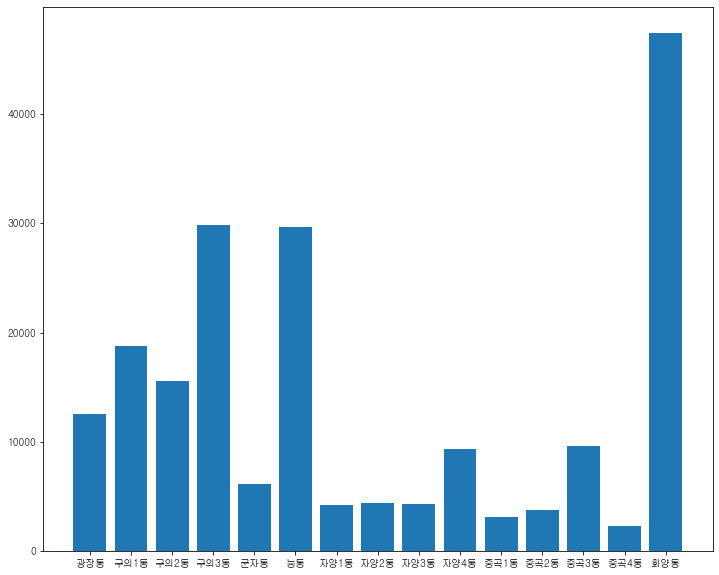

In [33]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(M.index,M.합계)


# 광진구 월요일 대중교통량

In [34]:
m_traffic = pd.read_csv('월요일 서울시 교통량.csv')
m_traffic.head()

,기준일,행정동ID,행정동명,자치구ID,자치구명,분석유형,합계,합계00H,합계01H,합계02H,...,경기14H,경기15H,경기16H,경기17H,경기18H,경기19H,경기20H,경기21H,경기22H,경기23H
0,20230529,1115065,신정2동,11150,양천구,4,2023,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230529,1115069,신정6동,11150,양천구,4,3263,19,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230529,1110056,방학2동,11100,도봉구,4,3345,10,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230529,1110060,창2동,11100,도봉구,4,5207,26,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230529,1110061,창3동,11100,도봉구,4,3614,14,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 월요일 데이터 가져오기

In [35]:
m_traffic = m_traffic[m_traffic['기준일'] == 20230529]
m_traffic.head()

,기준일,행정동ID,행정동명,자치구ID,자치구명,분석유형,합계,합계00H,합계01H,합계02H,...,경기14H,경기15H,경기16H,경기17H,경기18H,경기19H,경기20H,경기21H,경기22H,경기23H
0,20230529,1115065,신정2동,11150,양천구,4,2023,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230529,1115069,신정6동,11150,양천구,4,3263,19,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230529,1110056,방학2동,11100,도봉구,4,3345,10,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230529,1110060,창2동,11100,도봉구,4,5207,26,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230529,1110061,창3동,11100,도봉구,4,3614,14,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 광진구 데이터만 가져오기

In [36]:
m_traffic=m_traffic[m_traffic['자치구명'] == '광진구']
m_traffic.head()

,기준일,행정동ID,행정동명,자치구ID,자치구명,분석유형,합계,합계00H,합계01H,합계02H,...,경기14H,경기15H,경기16H,경기17H,경기18H,경기19H,경기20H,경기21H,경기22H,경기23H
150,20230529,1105054,군자동,11050,광진구,4,6819,75,14,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,20230529,1105055,중곡1동,11050,광진구,4,3399,43,14,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,20230529,1105056,중곡2동,11050,광진구,4,4301,31,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,20230529,1105059,능동,11050,광진구,4,32048,106,15,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,20230529,1105060,구의1동,11050,광진구,4,19228,35,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 광진구의 시간대별 합계 교통량

In [37]:
T=(
    m_traffic
    .groupby(['자치구명'])
    .agg('mean')
    .loc['광진구','합계00H':'합계23H']
    .round(0)
    .astype(int)

)
T

합계00H      47
합계01H      13
합계02H      12
합계03H       8
합계04H      30
합계05H     225
합계06H     311
합계07H     422
합계08H     653
합계09H     751
합계10H     766
합계11H     813
합계12H     898
합계13H     969
합계14H     937
합계15H     988
합계16H    1083
합계17H    1118
합계18H     994
합계19H     882
합계20H     833
합계21H     787
합계22H     633
합계23H     329
Name: 광진구, dtype: int32

<BarContainer object of 24 artists>

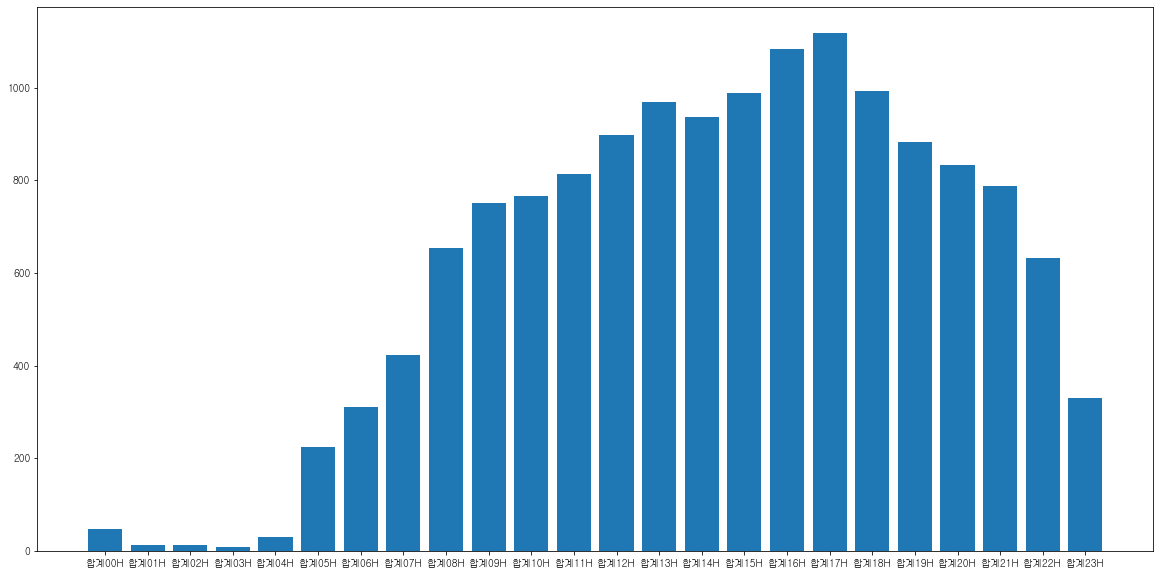

In [38]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(T.index, T)


## 행정동별 합계량 구하기

In [39]:
m_traffic=m_traffic.loc[:,['행정동명','합계']]
m_traffic.sort_values(by = ['행정동명','합계'], ascending = True, inplace = True)
m_traffic

,행정동명,합계
156,광장동,12182
154,구의1동,19228
155,구의2동,17194
274,구의3동,31831
150,군자동,6819
153,능동,32048
157,자양1동,4423
158,자양2동,4711
275,자양3동,4800
394,자양4동,13596


<BarContainer object of 15 artists>

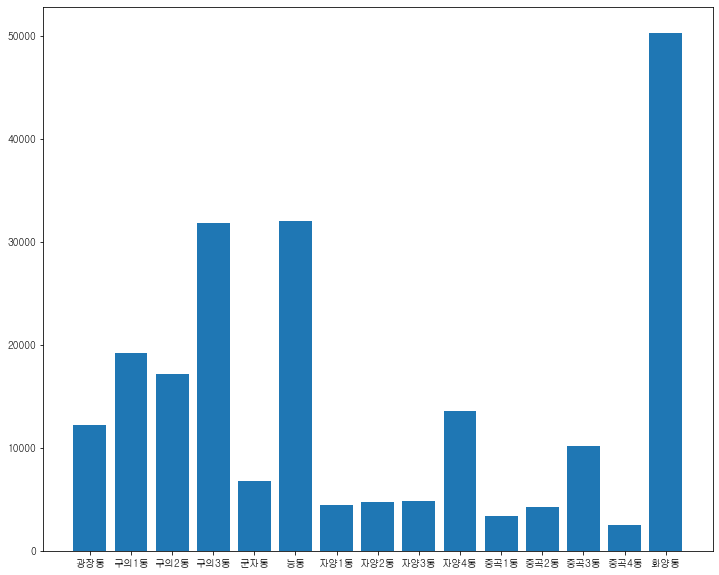

In [40]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(m_traffic.행정동명,m_traffic.합계)


## 일반 음식점 전처리

In [41]:
import pandas as pd
import numpy as np
import re

필요한 컬럼들만 모은 뒤에 현재 영업을 하는 곳들로 고름

In [42]:
Nomal_res = pd.read_csv('일반음식점.csv')
data = ['관리번호', '상세영업상태코드','지번주소','사업장명', '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '다중이용업소여부', '시설총규모']
Nomal_res = Nomal_res[data]
Nomal_res1 = Nomal_res.loc[Nomal_res['상세영업상태코드'] == 1]
Nomal_res1

,관리번호,상세영업상태코드,지번주소,사업장명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모
0,3040000-101-1976-00655,1,서울특별시 광진구 구의동 80-47,서북면옥,207471.1535,449242.9320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3040000-101-1976-05028,1,서울특별시 광진구 화양동 495-26번지,가람성,206685.8527,449228.7966,분식,0,NaN,학교정화(절대),을,상수도전용,N,62.56
2,3040000-101-1977-00803,1,서울특별시 광진구 구의동 252-35 1층,샤브삘,207380.4638,448387.7482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3040000-101-1977-00897,1,서울특별시 광진구 군자동 472-1번지,세꼬시마을,206715.2647,450582.9511,일식,0,NaN,주택가주변,을,상수도전용,N,32.34
4,3040000-101-1978-01439,1,서울특별시 광진구 자양동 637-0,서울회관,206953.0818,447676.2670,한식,NaN,NaN,주택가주변,을,상수도전용,N,38.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4283,3040000-101-2023-00205,1,서울특별시 광진구 화양동 17-10 1층,206086.3741,206086.3741,449463.5471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4284,3040000-101-2023-00206,1,서울특별시 광진구 화양동 11-22 1층,206157.9619,206157.9619,448999.1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4285,3040000-101-2023-00207,1,서울특별시 광진구 군자동 150-22 1-2층,206437.4555,206437.4555,450167.0216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4286,3040000-101-2023-00208,1,서울특별시 광진구 중곡동 92-40 1층,207768.1703,207768.1703,450449.0919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


살펴봤더니 좌표정보가 심하게 훼손되어있음 따라서 따로 엑셀에서 전처리를 진행 후 새로운 파일로 저장함

In [43]:
# 깔끔하게 좌표정보가 정리된 모습
Nomal_res_select = pd.read_csv('일반음식점.csv', encoding = 'utf-8')
Nomal_res_select.head()

,관리번호,상세영업상태코드,지번주소,사업장명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모
0,3040000-101-1976-00655,1,서울특별시 광진구 구의동 80-47,서북면옥,207471.1535,449242.9320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3040000-101-1976-05028,1,서울특별시 광진구 화양동 495-26번지,가람성,206685.8527,449228.7966,분식,0,NaN,학교정화(절대),을,상수도전용,N,62.56
2,3040000-101-1977-00803,1,서울특별시 광진구 구의동 252-35 1층,샤브삘,207380.4638,448387.7482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3040000-101-1977-00897,1,서울특별시 광진구 군자동 472-1번지,세꼬시마을,206715.2647,450582.9511,일식,0,NaN,주택가주변,을,상수도전용,N,32.34
4,3040000-101-1978-01439,1,서울특별시 광진구 자양동 637-0,서울회관,206953.0818,447676.2670,한식,NaN,NaN,주택가주변,을,상수도전용,N,38.50


좌표정보의 좌표 값이 중부원점(EPSG:2097)이기에 위도·경도(WGS84)로 변환시켜서 데이터 프레임에 저장

In [44]:
from pyproj import Proj, transform

proj_1 = Proj(init='epsg:2097')
proj_2 = Proj(init='epsg:4326')

converted = transform(proj_1, proj_2, Nomal_res_select['좌표정보(X)'].values, Nomal_res_select['좌표정보(Y)'].values)
Nomal_res_select['lon'] = converted[0]
Nomal_res_select['lat'] = converted[1]
Nomal_res_select

C:\Algorithm\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Algorithm\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\HJ\AppData\Local\Temp\ipykernel_26120\3866675800.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(proj_1, proj_2, No

,관리번호,상세영업상태코드,지번주소,사업장명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모,lon,lat
0,3040000-101-1976-00655,1,서울특별시 광진구 구의동 80-47,서북면옥,207471.1535,449242.9320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.082440,37.545417
1,3040000-101-1976-05028,1,서울특별시 광진구 화양동 495-26번지,가람성,206685.8527,449228.7966,분식,0,NaN,학교정화(절대),을,상수도전용,N,62.56,127.073553,37.545296
2,3040000-101-1977-00803,1,서울특별시 광진구 구의동 252-35 1층,샤브삘,207380.4638,448387.7482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.081405,37.537713
3,3040000-101-1977-00897,1,서울특별시 광진구 군자동 472-1번지,세꼬시마을,206715.2647,450582.9511,일식,0,NaN,주택가주변,을,상수도전용,N,32.34,127.073898,37.557496
4,3040000-101-1978-01439,1,서울특별시 광진구 자양동 637-0,서울회관,206953.0818,447676.2670,한식,NaN,NaN,주택가주변,을,상수도전용,N,38.50,127.076563,37.531306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4283,3040000-101-2023-00205,1,서울특별시 광진구 화양동 17-10 1층,206086.3741,206086.3741,449463.5471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.066772,37.547415
4284,3040000-101-2023-00206,1,서울특별시 광진구 화양동 11-22 1층,206157.9619,206157.9619,448999.1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.067578,37.543230
4285,3040000-101-2023-00207,1,서울특별시 광진구 군자동 150-22 1-2층,206437.4555,206437.4555,450167.0216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.070751,37.553751
4286,3040000-101-2023-00208,1,서울특별시 광진구 중곡동 92-40 1층,207768.1703,207768.1703,450449.0919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.085813,37.556282


여기에 지번주소에 적혀있는 주소중에 동들만 골라서 무슨동인지 알 수 있게 동 컬럼을 만들어 저장

In [45]:
Nomal_res_select.loc[:, "동"] = Nomal_res_select.loc[:, "지번주소"].apply(lambda x: re.findall(r"\b(\w+[동])\b", x)[0] if re.findall(r"\b(\w+[동])\b", x) else "")
Nomal_res_select.head()

,관리번호,상세영업상태코드,지번주소,사업장명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모,lon,lat,동
0,3040000-101-1976-00655,1,서울특별시 광진구 구의동 80-47,서북면옥,207471.1535,449242.9320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.082440,37.545417,구의동
1,3040000-101-1976-05028,1,서울특별시 광진구 화양동 495-26번지,가람성,206685.8527,449228.7966,분식,0,NaN,학교정화(절대),을,상수도전용,N,62.56,127.073553,37.545296,화양동
2,3040000-101-1977-00803,1,서울특별시 광진구 구의동 252-35 1층,샤브삘,207380.4638,448387.7482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.081405,37.537713,구의동
3,3040000-101-1977-00897,1,서울특별시 광진구 군자동 472-1번지,세꼬시마을,206715.2647,450582.9511,일식,0,NaN,주택가주변,을,상수도전용,N,32.34,127.073898,37.557496,군자동
4,3040000-101-1978-01439,1,서울특별시 광진구 자양동 637-0,서울회관,206953.0818,447676.2670,한식,NaN,NaN,주택가주변,을,상수도전용,N,38.50,127.076563,37.531306,자양동


일단 더 세세히 나누어져있지 않은 광장동, 능동, 군자동, 화양동의 일반 음식점 갯수를 확인

In [46]:
Nomal_res_select['동'].dropna().value_counts()

자양동    1007
화양동     890
구의동     878
중곡동     859
군자동     350
광장동     165
능동      135
          4
Name: 동, dtype: int64

남은 3개의 동 분류를 위해 원하는 컬럼들만 골라옴

In [47]:
data = ['관리번호','lat', 'lon', '동']
Nomal_res_dong = Nomal_res_select[data]
Nomal_res_dong = Nomal_res_dong.dropna()
Nomal_res_dong

,관리번호,lat,lon,동
0,3040000-101-1976-00655,37.545417,127.082440,구의동
1,3040000-101-1976-05028,37.545296,127.073553,화양동
2,3040000-101-1977-00803,37.537713,127.081405,구의동
3,3040000-101-1977-00897,37.557496,127.073898,군자동
4,3040000-101-1978-01439,37.531306,127.076563,자양동
...,...,...,...,...
4283,3040000-101-2023-00205,37.547415,127.066772,화양동
4284,3040000-101-2023-00206,37.543230,127.067578,화양동
4285,3040000-101-2023-00207,37.553751,127.070751,군자동
4286,3040000-101-2023-00208,37.556282,127.085813,중곡동


## 자양동 분류

In [48]:
jayang_dong = Nomal_res_dong.loc[Nomal_res_dong['동'] == '자양동']
jayang_dong

,관리번호,lat,lon,동
4,3040000-101-1978-01439,37.531306,127.076563,자양동
6,3040000-101-1979-00456,37.536404,127.059833,자양동
7,3040000-101-1979-01046,37.541330,127.061246,자양동
15,3040000-101-1980-02411,37.535953,127.080522,자양동
16,3040000-101-1980-02441,37.535410,127.075769,자양동
...,...,...,...,...
4272,3040000-101-2023-00193,37.540375,127.064180,자양동
4276,3040000-101-2023-00197,37.532405,127.075942,자양동
4279,3040000-101-2023-00200,37.532610,127.081611,자양동
4281,3040000-101-2023-00203,37.537097,127.062746,자양동


In [49]:
jayang_dong = Nomal_res_dong.loc[Nomal_res_dong['동'] == '자양동']
jayang_dong

,관리번호,lat,lon,동
4,3040000-101-1978-01439,37.531306,127.076563,자양동
6,3040000-101-1979-00456,37.536404,127.059833,자양동
7,3040000-101-1979-01046,37.541330,127.061246,자양동
15,3040000-101-1980-02411,37.535953,127.080522,자양동
16,3040000-101-1980-02441,37.535410,127.075769,자양동
...,...,...,...,...
4272,3040000-101-2023-00193,37.540375,127.064180,자양동
4276,3040000-101-2023-00197,37.532405,127.075942,자양동
4279,3040000-101-2023-00200,37.532610,127.081611,자양동
4281,3040000-101-2023-00203,37.537097,127.062746,자양동


직접 지도로 찍어 자양 1, 2, 3, 4동의 좌표 위치를 추려냄

In [50]:
# 자양제1동
jayang_dong1 = jayang_dong[(jayang_dong['lat'] > 37.5323942) & (jayang_dong['lat'] < 37.5380322)]
jayang_dong1 = jayang_dong1[(jayang_dong1['lon'] > 127.0757766) & (jayang_dong1['lon'] < 127.0851154)]

jayang_dong1.shape[0]

184

In [51]:
# 자양제2동
jayang_dong2 = jayang_dong[(jayang_dong['lat'] > 37.5274022) & (jayang_dong['lat'] < 37.5331203)]
jayang_dong2 = jayang_dong2[(jayang_dong2['lon'] > 127.0739399) & (jayang_dong2['lon'] < 127.0886404)]

jayang_dong2.shape[0]

175

In [52]:
# 자양제3동
jayang_dong3 = jayang_dong[(jayang_dong['lat'] > 37.5236360) & (jayang_dong['lat'] < 37.5397751)]
jayang_dong3 = jayang_dong3[(jayang_dong3['lon'] > 127.0647889) & (jayang_dong3['lon'] < 127.0770768)]

jayang_dong3.shape[0]

422

In [53]:
# 자양제4동
jayang_dong4 = jayang_dong[(jayang_dong['lat'] > 37.5318465) & (jayang_dong['lat'] < 37.5420298)]
jayang_dong4 = jayang_dong4[(jayang_dong4['lon'] > 127.0599123) & (jayang_dong4['lon'] < 127.0704618)]

jayang_dong4.shape[0]

485

## 중곡동 분류

In [54]:
junggok_dong = Nomal_res_select.loc[Nomal_res_select['동'] == '중곡동']
junggok_dong.shape[0]

859

In [55]:
# 중곡제1동
junggok_dong1 = junggok_dong[(junggok_dong['lat'] > 37.5574330) & (junggok_dong['lat'] < 37.5667161)]
junggok_dong1 = junggok_dong1[(junggok_dong1['lon'] > 127.0727598) & (junggok_dong1['lon'] < 127.0833049)]

junggok_dong1.shape[0]

414

In [56]:
# 중곡제2동
junggok_dong2 = junggok_dong[(junggok_dong['lat'] > 37.5539112) & (junggok_dong['lat'] < 37.5667161)]
junggok_dong2 = junggok_dong2[(junggok_dong2['lon'] > 127.0760401) & (junggok_dong2['lon'] < 127.0884658)]

junggok_dong2.shape[0]

552

In [57]:
# 중곡제3동
junggok_dong3 = junggok_dong[(junggok_dong['lat'] > 37.5633819) & (junggok_dong['lat'] < 37.5714738)]
junggok_dong3 = junggok_dong3[(junggok_dong3['lon'] > 127.0765105) & (junggok_dong3['lon'] < 127.0860994)]

junggok_dong3.shape[0]

262

In [58]:
# 중곡제4동
junggok_dong4 = junggok_dong[(junggok_dong['lat'] > 37.5523294) & (junggok_dong['lat'] < 37.5725489)]
junggok_dong4 = junggok_dong4[(junggok_dong2['lon'] > 127.0861467) & (junggok_dong4['lon'] < 127.1042036)]

junggok_dong4.shape[0]

43

## 구의동 분류

In [59]:
guui_dong = Nomal_res_select.loc[Nomal_res_select['동'] == '구의동']
guui_dong.shape[0]

878

In [60]:
# 구의제1동
guui_dong1 = guui_dong[(guui_dong['lat'] > 37.5366580) & (guui_dong['lat'] < 37.5446696)]
guui_dong1 = guui_dong1[(guui_dong1['lon'] > 127.0813730) & (guui_dong1['lon'] < 127.0906243)]

guui_dong1.shape[0]

407

In [61]:
# 구의제2동
guui_dong2 = guui_dong[(guui_dong['lat'] > 37.5431777) & (guui_dong['lat'] < 37.5583391)]
guui_dong2 = guui_dong2[(guui_dong2['lon'] > 127.0852407) & (guui_dong2['lon'] < 127.1047655)]

guui_dong2.shape[0]

236

In [62]:
# 구의제3동
guui_dong3 = guui_dong[(guui_dong['lat'] > 37.5296955) & (guui_dong['lat'] < 37.5446092)]
guui_dong3 = guui_dong3[(guui_dong3['lon'] > 127.0891346) & (guui_dong3['lon'] < 127.0957211)]

guui_dong3.shape[0]

190

## 내국인 생활인구 전처리

필요한 것들만 추려내서 정리

In [63]:
domestic_living = pd.read_csv('행정동단위생활인구.csv')
data = ['기준일ID', '시간대구분','행정동코드','총생활인구수']
domestic_living = domestic_living[data]
domestic_living

,기준일ID,시간대구분,행정동코드,총생활인구수
20230401,0,11740570,32301.1607,1378.8518
20230401,0,11530550,19649.7714,465.8689
20230401,0,11500611,34337.6024,1948.7378
20230401,0,11530595,9867.7706,78.4461
20230401,0,11500605,11985.3156,298.0669
...,...,...,...,...
20230430,23,11110615,27801.4195,511.0319
20230430,23,11350612,19306.2978,681.5004
20230430,23,11350625,33131.6615,1159.5382
20230430,23,11380600,26183.7959,591.2032


각 코드는 행정동을 나타내며 최신 기준일의 총생활인구수의 평균값을 구한다

In [64]:
codes = [11215710, 11215730, 11215740, 11215750, 11215760, 11215770, 11215780,
        11215810, 11215820, 11215830, 11215840, 11215847, 11215850, 11215860, 11215870]
for code in codes:
    domestic_living1 = domestic_living.loc[(domestic_living['기준일ID'] == 20230430) & (domestic_living['행정동코드'] == code)]
    print(f"행정동코드: {code}")
    print(domestic_living1['총생활인구수'].mean())
    print("-----")

행정동코드: 11215710
nan
-----
행정동코드: 11215730
nan
-----
행정동코드: 11215740
nan
-----
행정동코드: 11215750
nan
-----
행정동코드: 11215760
nan
-----
행정동코드: 11215770
nan
-----
행정동코드: 11215780
nan
-----
행정동코드: 11215810
nan
-----
행정동코드: 11215820
nan
-----
행정동코드: 11215830
nan
-----
행정동코드: 11215840
nan
-----
행정동코드: 11215847
nan
-----
행정동코드: 11215850
nan
-----
행정동코드: 11215860
nan
-----
행정동코드: 11215870
nan
-----


## 노상 주차장 전처리

In [65]:
street_parking = pd.read_csv('노상주차장.csv', encoding = 'utf-8')
data = ['지번주차장이름(pl_nm)', '법정동코드(bemd_code)','주소(지번)(lot_num_address)','위도(latitude)', '경도(longitude)']
street_parking_select = street_parking[data]
street_parking_select

,지번주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),위도(latitude),경도(longitude)
0,249-6 노상주차장,10300,서울특별시 광진구 구의동 249-6 드림-스페이스,37.555295,127.077648
1,16-81 노상주차장,10700,서울특별시 광진구 화양동 16-81,37.544867,127.069443
2,16-93 노상주차장,10700,서울특별시 광진구 화양동 16-93,37.544947,127.069553
3,16-35 노상주차장,10700,서울특별시 광진구 화양동 16-35,37.545087,127.069842
4,32-12 거주자우선주차장,10700,서울특별시 광진구 화양동 32-12,37.546392,127.067637
...,...,...,...,...,...
2525,송림기사식당길A노상공영주차장,10500,서울특별시 광진구 자양동 227-1,37.536322,127.076742
2526,송림기사식당길A노상공영주차장,10500,서울특별시 광진구 자양동 227-1,37.536365,127.076764
2527,596-7 노상주차장,10500,서울특별시 광진구 자양동 596-7,37.530932,127.078734
2528,다성시티빌앞주차장,10500,서울특별시 광진구 자양동 595-8,37.530415,127.078542


주소를 이용해 법정동을 알아내고 따로 열을 만듬

In [66]:
street_parking_select.loc[:, "법정동"] = street_parking_select.loc[:, "주소(지번)(lot_num_address)"].apply(lambda x: re.findall(r"\b(\w+[법정동])\b", x)[0] if re.findall(r"\b(\w+[법정동])\b", x) else "")
street_parking_select

C:\Users\HJ\AppData\Local\Temp\ipykernel_26120\1160425562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_parking_select.loc[:, "법정동"] = street_parking_select.loc[:, "주소(지번)(lot_num_address)"].apply(lambda x: re.findall(r"\b(\w+[법정동])\b", x)[0] if re.findall(r"\b(\w+[법정동])\b", x) else "")


,지번주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),위도(latitude),경도(longitude),법정동
0,249-6 노상주차장,10300,서울특별시 광진구 구의동 249-6 드림-스페이스,37.555295,127.077648,구의동
1,16-81 노상주차장,10700,서울특별시 광진구 화양동 16-81,37.544867,127.069443,화양동
2,16-93 노상주차장,10700,서울특별시 광진구 화양동 16-93,37.544947,127.069553,화양동
3,16-35 노상주차장,10700,서울특별시 광진구 화양동 16-35,37.545087,127.069842,화양동
4,32-12 거주자우선주차장,10700,서울특별시 광진구 화양동 32-12,37.546392,127.067637,화양동
...,...,...,...,...,...,...
2525,송림기사식당길A노상공영주차장,10500,서울특별시 광진구 자양동 227-1,37.536322,127.076742,자양동
2526,송림기사식당길A노상공영주차장,10500,서울특별시 광진구 자양동 227-1,37.536365,127.076764,자양동
2527,596-7 노상주차장,10500,서울특별시 광진구 자양동 596-7,37.530932,127.078734,자양동
2528,다성시티빌앞주차장,10500,서울특별시 광진구 자양동 595-8,37.530415,127.078542,자양동


행정동으로 분류 안되는 법정동 4개의 개수를 먼저 구함

In [67]:
def get_unique_parking_count(df, dong):
    dong_data = df.loc[df['법정동'] == dong]
    unique_parking = dong_data.drop_duplicates(subset='지번주차장이름(pl_nm)')
    return unique_parking.drop_duplicates(subset='주소(지번)(lot_num_address)').shape[0]

dong_list = ['광장동', '군자동', '능동', '화양동']

for dong in dong_list:
    count = get_unique_parking_count(street_parking_select, dong)
    print(f"{dong}: {count}")


광장동: 34
군자동: 15
능동: 42
화양동: 64


## 구의동 분류

In [68]:
guui_dong = street_parking_select.loc[street_parking_select['법정동'] == '구의동']
guui_dong = guui_dong.drop_duplicates(subset= '지번주차장이름(pl_nm)')
guui_dong = guui_dong.drop_duplicates(subset= '주소(지번)(lot_num_address)')
guui_dong

,지번주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),위도(latitude),경도(longitude),법정동
0,249-6 노상주차장,10300,서울특별시 광진구 구의동 249-6 드림-스페이스,37.555295,127.077648,구의동
234,617-26 노상주차장,10300,서울특별시 광진구 구의동 612-7,37.547916,127.085697,구의동
235,612-15 노상주차장,10300,서울특별시 광진구 구의동 617-26 그랜드파크빌,37.548149,127.085591,구의동
236,617-33 노상주차장,10300,서울특별시 광진구 구의동 612-15,37.547585,127.085815,구의동
238,612-10 노상주차장,10300,서울특별시 광진구 구의동 617-33 구의2동제2경로당,37.548471,127.085467,구의동
...,...,...,...,...,...,...
614,231-18 노상주차장,10300,서울특별시 광진구 구의동 231-18,37.541080,127.095156,구의동
615,211-23 노상주차장,10300,서울특별시 광진구 구의동 211-23 동부훼미리,37.540780,127.092348,구의동
617,224-6 노상주차장,10300,서울특별시 광진구 구의동 224-6,37.542756,127.090477,구의동
659,202-10 노상주차장,10300,서울특별시 광진구 구의동 202-10 부흥빌라,37.542127,127.095241,구의동


In [69]:
# 구의제1동
guui_dong1 = guui_dong[(guui_dong['위도(latitude)'] > 37.5366580) & (guui_dong['위도(latitude)'] < 37.5446696)]
guui_dong1 = guui_dong1[(guui_dong1['경도(longitude)'] > 127.0813730) & (guui_dong1['경도(longitude)'] < 127.0906243)]

guui_dong1.shape[0]

16

In [70]:
# 구의제2동
guui_dong2 = guui_dong[(guui_dong['위도(latitude)'] > 37.5431777) & (guui_dong['위도(latitude)'] < 37.5583391)]
guui_dong2 = guui_dong2[(guui_dong2['경도(longitude)'] > 127.0852407) & (guui_dong2['경도(longitude)'] < 127.1047655)]

guui_dong2.shape[0]

52

In [71]:
# 구의제3동
guui_dong3 = guui_dong[(guui_dong['위도(latitude)'] > 37.5296955) & (guui_dong['위도(latitude)'] < 37.5446092)]
guui_dong3 = guui_dong3[(guui_dong3['경도(longitude)'] > 127.0891346) & (guui_dong3['경도(longitude)'] < 127.0957211)]

guui_dong3.shape[0]

34

구의동과 마찬가지로 먼저 처리해줌

In [72]:
jayang_dong = street_parking_select.loc[street_parking_select['법정동'] == '자양동']
jayang_dong = jayang_dong.drop_duplicates(subset= '지번주차장이름(pl_nm)')
jayang_dong = jayang_dong.drop_duplicates(subset= '주소(지번)(lot_num_address)')
jayang_dong

,지번주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),위도(latitude),경도(longitude),법정동
153,526-34 거주자우선주차장,10700,서울특별시 광진구 자양동 226-32,37.538909,127.075122,자양동
384,616-16 노상주차장,10300,서울특별시 광진구 자양동 616-16,37.548437,127.086876,자양동
389,614-13 노상주차장,10300,서울특별시 광진구 자양동 614-13,37.548670,127.087855,자양동
390,615-27 노상주차장,10300,서울특별시 광진구 자양동 615-27,37.548611,127.087823,자양동
399,617-40 노상주차장,10300,서울특별시 광진구 자양동 617-40,37.548611,127.086544,자양동
...,...,...,...,...,...,...
2328,5-49 노상주차장,10500,서울특별시 광진구 자양동 5-49,37.539183,127.069255,자양동
2330,600-7 노상주차장,10500,서울특별시 광진구 자양동 600-7,37.531333,127.075839,자양동
2358,181-1 노상주차장,10500,서울특별시 광진구 자양동 5088 180-4,37.533805,127.061283,자양동
2368,꿈에그린아파트102동앞거주자우선주차상,10500,서울특별시 광진구 자양동 179-1,37.534132,127.061544,자양동


In [73]:
# 자양제1동
jayang_dong1 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5323942) & (jayang_dong['위도(latitude)'] < 37.5380322)]
jayang_dong1 = jayang_dong1[(jayang_dong1['경도(longitude)'] > 127.0757766) & (jayang_dong1['경도(longitude)'] < 127.0851154)]

jayang_dong1.shape[0]

12

In [74]:
# 자양제2동
jayang_dong2 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5274022) & (jayang_dong['위도(latitude)'] < 37.5331203)]
jayang_dong2 = jayang_dong2[(jayang_dong2['경도(longitude)'] > 127.0739399) & (jayang_dong2['경도(longitude)'] < 127.0886404)]

jayang_dong2.shape[0]

92

In [75]:
# 자양제3동
jayang_dong3 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5236360) & (jayang_dong['위도(latitude)'] < 37.5397751)]
jayang_dong3 = jayang_dong3[(jayang_dong3['경도(longitude)'] > 127.0647889) & (jayang_dong3['경도(longitude)'] < 127.0770768)]

jayang_dong3.shape[0]

65

In [76]:
# 자양제4동
jayang_dong4 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5318465) & (jayang_dong['위도(latitude)'] < 37.5420298)]
jayang_dong4 = jayang_dong4[(jayang_dong4['경도(longitude)'] > 127.0599123) & (jayang_dong4['경도(longitude)'] < 127.0704618)]

jayang_dong4.shape[0]

39

## 중곡동 분류

In [77]:
junggok_dong = street_parking_select.loc[street_parking_select['법정동'] == '중곡동']
junggok_dong = junggok_dong.drop_duplicates(subset= '지번주차장이름(pl_nm)')
junggok_dong = junggok_dong.drop_duplicates(subset= '주소(지번)(lot_num_address)')
junggok_dong

,지번주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),위도(latitude),경도(longitude),법정동
315,270-6 노상주차장,10200,서울특별시 광진구 중곡동 244-31,37.553360,127.084829,중곡동
472,241-12 노상주차장,10300,서울특별시 광진구 중곡동 241-12,37.540675,127.087998,중곡동
848,69-31 노상주차장,10100,서울특별시 광진구 중곡동 69-31,37.559254,127.092004,중곡동
849,150-127 노상주차장,10100,서울특별시 광진구 중곡동 150-127,37.560437,127.086837,중곡동
850,77-23 노상주차장,10100,서울특별시 광진구 중곡동 77-23,37.558837,127.089004,중곡동
...,...,...,...,...,...,...
1440,452-2 거주자우선주차장,10100,서울특별시 광진구 중곡동 452-2,37.558311,127.089478,중곡동
1448,467-1 거주자우선주차장,10100,서울특별시 광진구 중곡동 467-1,37.557501,127.090640,중곡동
1464,452-1 거주자우선주차장,10100,서울특별시 광진구 중곡동 452-1,37.559006,127.090818,중곡동
1467,450-2 거주자우선주차장,10100,서울특별시 광진구 중곡동 450-2,37.559509,127.091094,중곡동


In [78]:
# 중곡제1동
junggok_dong1 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5574330) & (junggok_dong['위도(latitude)'] < 37.5667161)]
junggok_dong1 = junggok_dong1[(junggok_dong1['경도(longitude)'] > 127.0727598) & (junggok_dong1['경도(longitude)'] < 127.0833049)]

junggok_dong1.shape[0]

55

In [79]:
# 중곡제2동
junggok_dong2 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5539112) & (junggok_dong['위도(latitude)'] < 37.5667161)]
junggok_dong2 = junggok_dong2[(junggok_dong2['경도(longitude)'] > 127.0760401) & (junggok_dong2['경도(longitude)'] < 127.0884658)]

junggok_dong2.shape[0]

135

In [80]:
# 중곡제3동
junggok_dong3 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5633819) & (junggok_dong['위도(latitude)'] < 37.5714738)]
junggok_dong3 = junggok_dong3[(junggok_dong3['경도(longitude)'] > 127.0765105) & (junggok_dong3['경도(longitude)'] < 127.0860994)]

junggok_dong3.shape[0]

70

In [81]:
# 중곡제4동
junggok_dong4 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5523294) & (junggok_dong['위도(latitude)'] < 37.5725489)]
junggok_dong4 = junggok_dong4[(junggok_dong2['경도(longitude)'] > 127.0861467) & (junggok_dong4['경도(longitude)'] < 127.1042036)]

junggok_dong4.shape[0]

41

## 부설 주차장 전처리

필요한 컬럼들만 모은 데이터 프레임 생성 후 일반인이용이 가능한 주차장들만 추려서 봄

In [82]:
attached_parking = pd.read_csv('부설주차장.csv', encoding = 'utf-8')
data = ['주차장이름(pl_nm)', '법정동코드(bemd_code)','주소(지번)(lot_num_address)','새주소-도로명(road_nm_address)', '일반인이용(pl_open_public)',
       '공유주차장구분(shared_parkinglot)', '위도(latitude)', '경도(logitude)']
attached_parking_select = attached_parking[data]
attached_parking_select = attached_parking_select.loc[attached_parking_select['일반인이용(pl_open_public)'] == '일반인 개방']
attached_parking_select

,주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),새주소-도로명(road_nm_address),일반인이용(pl_open_public),공유주차장구분(shared_parkinglot),위도(latitude),경도(logitude)
0,능동로32길 073-00 주차장,10200,서울특별시 광진구 능동 239-20,능동로32길,일반인 개방,미공유,37.554053,127.082462
2,능동로32길 106-05 주차장,10200,서울특별시 광진구 능동 243-23,능동로32길,일반인 개방,미공유,37.553057,127.083952
3,에스에치빌 주차장,10200,서울특별시 광진구 능동 254-28 에스에치빌,천호대로120길,일반인 개방,미공유,37.553290,127.086620
5,천호대로114길 021-00 주차장,10200,서울특별시 광진구 능동 238-6,천호대로114길,일반인 개방,미공유,37.554738,127.082645
6,천호대로112길 058-08 주차장,10200,서울특별시 광진구 능동 370-1,천호대로112길,일반인 개방,미공유,37.554025,127.080010
...,...,...,...,...,...,...,...,...
15815,대성예가 주차장,10100,서울특별시 광진구 중곡동 110-5,자양로53길,일반인 개방,미공유,37.554612,127.092491
15816,자양로51길 030-05 주차장,10100,서울특별시 광진구 중곡동 110-29,자양로51길,일반인 개방,미공유,37.554447,127.092247
15817,천호대로127길 038-00 주차장,10100,서울특별시 광진구 중곡동 112-10,천호대로127길,일반인 개방,미공유,37.554151,127.090747
15818,자양로45길 079-00 주차장,10100,서울특별시 광진구 중곡동 94-18,자양로45길,일반인 개방,미공유,37.554584,127.089799


주소를 통해 마찬가지로 법정동을 추려냄

In [83]:
attached_parking_select.loc[:, "법정동"] = attached_parking_select.loc[:, "주소(지번)(lot_num_address)"].apply(lambda x: re.findall(r"\b(\w+[법정동])\b", x)[0] if re.findall(r"\b(\w+[법정동])\b", x) else "")
attached_parking_select

,주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),새주소-도로명(road_nm_address),일반인이용(pl_open_public),공유주차장구분(shared_parkinglot),위도(latitude),경도(logitude),법정동
0,능동로32길 073-00 주차장,10200,서울특별시 광진구 능동 239-20,능동로32길,일반인 개방,미공유,37.554053,127.082462,능동
2,능동로32길 106-05 주차장,10200,서울특별시 광진구 능동 243-23,능동로32길,일반인 개방,미공유,37.553057,127.083952,능동
3,에스에치빌 주차장,10200,서울특별시 광진구 능동 254-28 에스에치빌,천호대로120길,일반인 개방,미공유,37.553290,127.086620,능동
5,천호대로114길 021-00 주차장,10200,서울특별시 광진구 능동 238-6,천호대로114길,일반인 개방,미공유,37.554738,127.082645,능동
6,천호대로112길 058-08 주차장,10200,서울특별시 광진구 능동 370-1,천호대로112길,일반인 개방,미공유,37.554025,127.080010,능동
...,...,...,...,...,...,...,...,...,...
15815,대성예가 주차장,10100,서울특별시 광진구 중곡동 110-5,자양로53길,일반인 개방,미공유,37.554612,127.092491,중곡동
15816,자양로51길 030-05 주차장,10100,서울특별시 광진구 중곡동 110-29,자양로51길,일반인 개방,미공유,37.554447,127.092247,중곡동
15817,천호대로127길 038-00 주차장,10100,서울특별시 광진구 중곡동 112-10,천호대로127길,일반인 개방,미공유,37.554151,127.090747,중곡동
15818,자양로45길 079-00 주차장,10100,서울특별시 광진구 중곡동 94-18,자양로45길,일반인 개방,미공유,37.554584,127.089799,중곡동


행정동으로 분류 안되는 동들 부터 확인

In [84]:
dong_list = ['광장동', '군자동', '능동', '화양동']

for dong in dong_list:
    count = attached_parking_select.loc[attached_parking_select['법정동'] == dong].shape[0]
    print(f"{dong}: {count}")


광장동: 325
군자동: 987
능동: 816
화양동: 1124


## 구의동 분류

In [85]:
guui_dong = attached_parking_select.loc[attached_parking_select['법정동'] == '구의동']
guui_dong

,주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),새주소-도로명(road_nm_address),일반인이용(pl_open_public),공유주차장구분(shared_parkinglot),위도(latitude),경도(logitude),법정동
5826,광진그랜드파크아파트 주차장,10700,서울특별시 광진구 구의동 680,광나루로,일반인 개방,미공유,37.544843,127.080245,구의동
5830,광진구창업지원센타 주차장,10300,서울특별시 광진구 구의동 632-9 광진구창업지원센타,광나루로,일반인 개방,미공유,37.545077,127.081839,구의동
5831,광진 경제허브센터 도약관 주차장,10300,서울특별시 광진구 구의동 632-11 광진 경제허브센터 도약관,광나루로,일반인 개방,미공유,37.545074,127.082218,구의동
5832,주함해븐힐 주차장,10300,서울특별시 광진구 구의동 650-11 주함해븐힐,자양로23가길,일반인 개방,미공유,37.542187,127.081519,구의동
5835,정원빌라 주차장,10300,서울특별시 광진구 구의동 253-38,광나루로,일반인 개방,미공유,37.546703,127.084768,구의동
...,...,...,...,...,...,...,...,...,...
10146,구의로6길 022-00 주차장,10300,서울특별시 광진구 구의동 209-69,구의로6길,일반인 개방,미공유,37.541355,127.091210,구의동
10147,구의로6길 024-14 주차장,10300,서울특별시 광진구 구의동 209-61,구의로6길,일반인 개방,미공유,37.540838,127.091147,구의동
10148,알펜시아7차 주차장,10300,서울특별시 광진구 구의동 209-68,구의로6길,일반인 개방,미공유,37.542032,127.090952,구의동
10149,구의로6길 024-05 주차장,10300,서울특별시 광진구 구의동 209-71,구의로6길,일반인 개방,미공유,37.541135,127.091464,구의동


In [86]:
# 구의제1동
guui_dong1 = guui_dong[(guui_dong['위도(latitude)'] > 37.5366580) & (guui_dong['위도(latitude)'] < 37.5446696)]
guui_dong1 = guui_dong1[(guui_dong1['경도(logitude)'] > 127.0813730) & (guui_dong1['경도(logitude)'] < 127.0906243)]

guui_dong1.shape[0]

1584

In [87]:
# 구의제2동
guui_dong2 = guui_dong[(guui_dong['위도(latitude)'] > 37.5431777) & (guui_dong['위도(latitude)'] < 37.5583391)]
guui_dong2 = guui_dong2[(guui_dong2['경도(logitude)'] > 127.0852407) & (guui_dong2['경도(logitude)'] < 127.1047655)]

guui_dong2.shape[0]

1421

In [88]:
# 구의제3동
guui_dong3 = guui_dong[(guui_dong['위도(latitude)'] > 37.5296955) & (guui_dong['위도(latitude)'] < 37.5446092)]
guui_dong3 = guui_dong3[(guui_dong3['경도(logitude)'] > 127.0891346) & (guui_dong3['경도(logitude)'] < 127.0957211)]

guui_dong3.shape[0]

843

## 자양동 분류

In [89]:
jayang_dong = attached_parking_select.loc[attached_parking_select['법정동'] == '자양동']
jayang_dong

,주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),새주소-도로명(road_nm_address),일반인이용(pl_open_public),공유주차장구분(shared_parkinglot),위도(latitude),경도(logitude),법정동
1158,다온오피스텔 주차장,10500,서울특별시 광진구 자양동 227-32 다온오피스텔,아차산로38길,일반인 개방,미공유,37.538098,127.075145,자양동
1159,자양번영로9길 016-08 주차장,10500,서울특별시 광진구 자양동 227-259,자양번영로9길,일반인 개방,미공유,37.536560,127.075729,자양동
1160,위너시원 주차장,10500,서울특별시 광진구 자양동 227-276 위너시원,자양번영로7길,일반인 개방,미공유,37.536014,127.075689,자양동
1161,에코하임 주차장,10500,서울특별시 광진구 자양동 232-8 에코하임,아차산로44가길,일반인 개방,미공유,37.535222,127.079431,자양동
1162,아차산로44가길 026-00 주차장,10500,서울특별시 광진구 자양동 232-27,아차산로44가길,일반인 개방,미공유,37.535339,127.079465,자양동
...,...,...,...,...,...,...,...,...,...
4688,뚝섬로50길 007-07 주차장,10500,서울특별시 광진구 자양동 606-33,뚝섬로50길,일반인 개방,미공유,37.531930,127.078592,자양동
4689,뚝섬로50길 007-05 주차장,10500,서울특별시 광진구 자양동 606-34,뚝섬로50길,일반인 개방,미공유,37.531962,127.078481,자양동
4690,뚝섬로48길 009-00 주차장,10500,서울특별시 광진구 자양동 604-14,뚝섬로48길,일반인 개방,미공유,37.531582,127.077506,자양동
5833,뚝섬로52나길 056-00 주차장,10300,서울특별시 광진구 자양동 650-2,뚝섬로52나길,일반인 개방,미공유,37.543127,127.081520,자양동


In [90]:
# 자양제1동
jayang_dong1 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5323942) & (jayang_dong['위도(latitude)'] < 37.5380322)]
jayang_dong1 = jayang_dong1[(jayang_dong1['경도(logitude)'] > 127.0757766) & (jayang_dong1['경도(logitude)'] < 127.0851154)]

jayang_dong1.shape[0]

1065

In [91]:
# 자양제2동
jayang_dong2 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5274022) & (jayang_dong['위도(latitude)'] < 37.5331203)]
jayang_dong2 = jayang_dong2[(jayang_dong2['경도(logitude)'] > 127.0739399) & (jayang_dong2['경도(logitude)'] < 127.0886404)]

jayang_dong2.shape[0]

1306

In [92]:
# 자양제3동
jayang_dong3 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5236360) & (jayang_dong['위도(latitude)'] < 37.5397751)]
jayang_dong3 = jayang_dong3[(jayang_dong3['경도(logitude)'] > 127.0647889) & (jayang_dong3['경도(logitude)'] < 127.0770768)]

jayang_dong3.shape[0]

1005

In [93]:
# 자양제4동
jayang_dong4 = jayang_dong[(jayang_dong['위도(latitude)'] > 37.5318465) & (jayang_dong['위도(latitude)'] < 37.5420298)]
jayang_dong4 = jayang_dong4[(jayang_dong4['경도(logitude)'] > 127.0599123) & (jayang_dong4['경도(logitude)'] < 127.0704618)]

jayang_dong4.shape[0]

835

## 중곡동 분류

In [94]:
junggok_dong = attached_parking_select.loc[attached_parking_select['법정동'] == '중곡동']
junggok_dong

,주차장이름(pl_nm),법정동코드(bemd_code),주소(지번)(lot_num_address),새주소-도로명(road_nm_address),일반인이용(pl_open_public),공유주차장구분(shared_parkinglot),위도(latitude),경도(logitude),법정동
301,어린이대공원부설주차장 주차장,10200,서울특별시 광진구 중곡동 256-5,면목로,일반인 개방,미공유,37.552432,127.088890,중곡동
10279,답십리로 364-00 주차장,10100,서울특별시 광진구 중곡동 582-3,답십리로,일반인 개방,미공유,37.571518,127.080803,중곡동
10280,답십리로 370-00 주차장,10100,서울특별시 광진구 중곡동 566-1,답십리로,일반인 개방,미공유,37.571430,127.081562,중곡동
10281,화랑 주차장,10100,서울특별시 광진구 중곡동 565-10,답십리로,일반인 개방,미공유,37.571341,127.081661,중곡동
10282,답십리로 374-00 주차장,10100,서울특별시 광진구 중곡동 564-11,답십리로,일반인 개방,미공유,37.571399,127.081971,중곡동
...,...,...,...,...,...,...,...,...,...
15815,대성예가 주차장,10100,서울특별시 광진구 중곡동 110-5,자양로53길,일반인 개방,미공유,37.554612,127.092491,중곡동
15816,자양로51길 030-05 주차장,10100,서울특별시 광진구 중곡동 110-29,자양로51길,일반인 개방,미공유,37.554447,127.092247,중곡동
15817,천호대로127길 038-00 주차장,10100,서울특별시 광진구 중곡동 112-10,천호대로127길,일반인 개방,미공유,37.554151,127.090747,중곡동
15818,자양로45길 079-00 주차장,10100,서울특별시 광진구 중곡동 94-18,자양로45길,일반인 개방,미공유,37.554584,127.089799,중곡동


In [95]:
# 중곡제1동
junggok_dong1 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5574330) & (junggok_dong['위도(latitude)'] < 37.5667161)]
junggok_dong1 = junggok_dong1[(junggok_dong1['경도(logitude)'] > 127.0727598) & (junggok_dong1['경도(logitude)'] < 127.0833049)]

junggok_dong1.shape[0]

1792

In [96]:
# 중곡제2동
junggok_dong2 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5539112) & (junggok_dong['위도(latitude)'] < 37.5667161)]
junggok_dong2 = junggok_dong2[(junggok_dong2['경도(logitude)'] > 127.0760401) & (junggok_dong2['경도(logitude)'] < 127.0884658)]

junggok_dong2.shape[0]

3000

In [97]:
# 중곡제3동
junggok_dong3 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5633819) & (junggok_dong['위도(latitude)'] < 37.5714738)]
junggok_dong3 = junggok_dong3[(junggok_dong3['경도(logitude)'] > 127.0765105) & (junggok_dong3['경도(logitude)'] < 127.0860994)]

junggok_dong3.shape[0]

1529

In [98]:
# 중곡제4동
junggok_dong4 = junggok_dong[(junggok_dong['위도(latitude)'] > 37.5523294) & (junggok_dong['위도(latitude)'] < 37.5725489)]
junggok_dong4 = junggok_dong4[(junggok_dong2['경도(logitude)'] > 127.0861467) & (junggok_dong4['경도(logitude)'] < 127.1042036)]

junggok_dong4.shape[0]

553